# IMPORT STATEMENTS

In [72]:
import numpy as np
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,mean_absolute_error


# IMPORTING AND NORMALIZING DATASET

In [73]:
df = pd.read_csv('housing.data', header=None)
rows = df.shape[0]

In [74]:
X = df.loc[:,[0,1,2,4,5,6,7,8,9,10,11,12]]

X=(X-X.min())/(X.max()-X.min())
X["3"] = df.loc[:,3]
X["13"] = rows*[1]

Y = df.iloc[:,13]
np.random.seed(9)
arr_rand = np.random.rand(X.shape[0])
split = arr_rand < np.percentile(arr_rand, 70)
X_train = X[split]
Y_train = Y[split]
X_test =  X[~split]
Y_test = Y[~split]


In [75]:
epsilon = 0.01
def mean_absolute_relative_error(y, yhat):
  return (100/y.size)*np.sum((np.abs(y-yhat)/(np.abs(y) + epsilon)))

# MULTVARIATE LINEAR REGRESSION (CLOSED FORM)

Mean Square Error :  21.309314289856715
Mean Absolute Error :  3.313763534970859
Mean Absolute Relative Error :  16.92419353858135


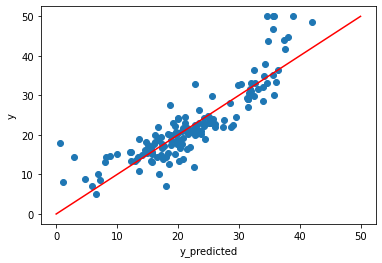

In [76]:

W = np.linalg.inv(X_train.T@X_train)@(X_train.T@Y_train)


X_line = np.linspace(0,50,100)

y_predicted = X_test @ W
Y_line = X_line
plt.scatter(y_predicted,Y_test)
plt.xlabel('y_predicted')
plt.ylabel('y')
plt.plot(X_line,Y_line , '-r') 



MSE = mean_squared_error(Y_test, y_predicted)
print("Mean Square Error : ", MSE)
MAE = mean_absolute_error(Y_test, y_predicted)
print("Mean Absolute Error : ", MAE)
MARE = mean_absolute_relative_error(Y_test, y_predicted)
print("Mean Absolute Relative Error : ", MARE)


# UNIVARIATE LINEAR REGRESSION (CLOSED FORM)  

Mean Square Error :  38.670834432648064
Mean Absolute Error :  4.63109735870525
Mean Absolute Relative Error :  21.97307578962116


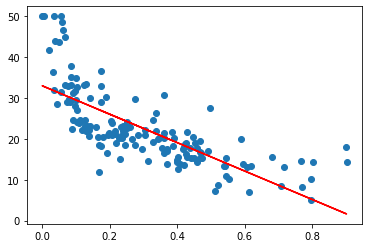

In [77]:
X_uni = X_train.iloc[:,11]
X_dummied = np.zeros((X_train.shape[0], 2))
X_dummied[:,1] = 1
X_dummied[:,0] = X_uni 
m_disc, b_disc = np.linalg.inv(X_dummied.T@X_dummied)@(X_dummied.T@Y_train)

Yhat = m_disc*X_test.iloc[:,11] + b_disc

MSE = mean_squared_error(Y_test, Yhat)
print("Mean Square Error : ", MSE)
MAE = mean_absolute_error(Y_test, Yhat)
print("Mean Absolute Error : ", MAE)
MARE = mean_absolute_relative_error(Y_test, Yhat)
print("Mean Absolute Relative Error : ", MARE)
plt.scatter(X_test.iloc[:,11], Y_test)
plt.plot(X_test.iloc[:,11], Yhat, color="red")
plt.show()

# UNIVARIATE GRADIENT DESCENT 

In [78]:
learning_rate = 0.1
n_iters = 5000

Mean Square Error :  38.67083443264801
Mean Absolute Error :  4.6310973587052295
Mean Absolute Relative Error :  21.97307578962102


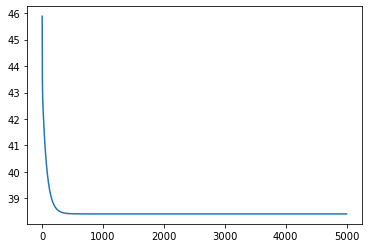

In [79]:
m_disc, b_disc = np.random.uniform(low=-32, high=32, size=2)
length = X_train.shape[0]
costs = []
for _ in range(n_iters):
    yhat = m_disc*X_uni + b_disc
    cost = np.mean((Y_train - yhat)**2)
    costs.append(cost)
    dm = (1/length)*(-2*Y_train.T@X_uni +2*m_disc*X_uni.T@X_uni +2*b_disc*np.sum(X_uni))
    db = (1/length)*(-2*np.sum(Y_train)+2*m_disc*np.sum(X_uni) +2*length*b_disc )
    m_disc = m_disc - learning_rate*dm 
    b_disc = b_disc - learning_rate*db

plt.plot(costs)
Yhat = m_disc*X_test.iloc[:,11] + b_disc
MSE = mean_squared_error(Y_test, Yhat)
print("Mean Square Error : ", MSE)
MAE = mean_absolute_error(Y_test, Yhat)
print("Mean Absolute Error : ", MAE)
MARE = mean_absolute_relative_error(Y_test, Yhat)
print("Mean Absolute Relative Error : ", MARE)

# MULTIVARIATE GRADIENT DECENT

In [80]:
learning_rate = 0.1
n_iters = 5000

Mean Square Error :  21.117471007916066
Mean Absolute Error :  3.2754778491173986
Mean Absolute Relative Error :  16.773965979548535


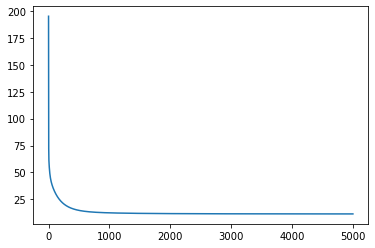

In [81]:
B = np.random.uniform(low=-10, high=10, size=14)
costs = []
length = X_train.shape[0]
X_input = X_train.iloc[:,0:13]
X_input["13"] = length*[1]

for _ in range(n_iters):
    h = X_input@B
    loss = h - Y_train
    gradient = X_input.T@loss/length
    B = B - learning_rate*gradient
    cost = np.sum((X_input@B - Y_train)**2) / (2*length)
    costs.append(cost)
# B

Yhat = X_test@B
MSE = mean_squared_error(Y_test, Yhat)
print("Mean Square Error : ", MSE)
MAE = mean_absolute_error(Y_test, Yhat)
print("Mean Absolute Error : ", MAE)
MARE = mean_absolute_relative_error(Y_test, Yhat)
print("Mean Absolute Relative Error : ", MARE)
plt.plot(costs)

# MULTIVARAITE NEWTON'S METHOD

In [82]:
n_iters = 2800

Mean Square Error :  21.31723475480908
Mean Absolute Error :  3.312402822818209
Mean Absolute Relative Error :  16.913841846554988


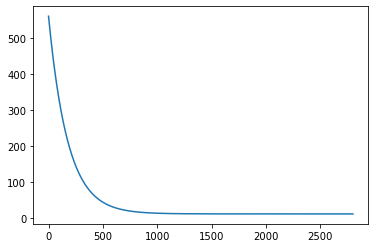

In [83]:
B = np.random.uniform(low=-10, high=10, size=14)
length = X_train.shape[0]
X_input = X_train.iloc[:,0:13]
X_input["13"] = length*[1]
costs = []
for _ in range(n_iters):
    h = X_input@B
    loss = h - Y_train
    gradient = X_input.T@loss/length
    B = B - np.linalg.inv(X_input.T@X_input)@gradient
    cost = np.sum((X_input@B - Y_train)**2) / (2*length)
    costs.append(cost)

Yhat = X_test@B
MSE = mean_squared_error(Y_test, Yhat)
print("Mean Square Error : ", MSE)
MAE = mean_absolute_error(Y_test, Yhat)
print("Mean Absolute Error : ", MAE)
MARE = mean_absolute_relative_error(Y_test, Yhat)
print("Mean Absolute Relative Error : ", MARE)
plt.plot(costs)

# UNIVARIATE NEWTON METHOD

In [84]:
n_iters = 2800

Mean Square Error :  38.67083443264806
Mean Absolute Error :  4.631097358705244
Mean Absolute Relative Error :  21.973075789621124


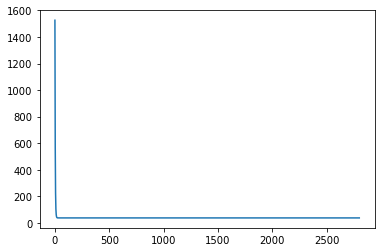

In [85]:
m_disc, b_disc = np.random.uniform(low = -32, high = 32, size = 2)
X_uni = X_train.iloc[:,11]
costs = []
length = X_train.shape[0]
for _ in range(n_iters):
    yhat = m_disc*X_uni + b_disc
    cost = np.mean((Y_train - yhat)**2)
    costs.append(cost)
    dm1 = (1/length)*(-2*Y_train.T@X_uni +2*m_disc*X_uni.T@X_uni +2*b_disc*np.sum(X_uni))
    dm2 = (1/length)*(2*X_uni.T@X_uni)
    db1 = (1/length)*(-2*np.sum(Y_train)+2*m_disc*np.sum(X_uni) +2*length*b_disc )
    db2 = (1/length)*(2*length)
    m_disc = m_disc - (dm1/dm2) 
    b_disc = b_disc - (db1/db2)


Yhat = m_disc*X_test.iloc[:,11] + b_disc
MSE = mean_squared_error(Y_test, Yhat)
print("Mean Square Error : ", MSE)
MAE = mean_absolute_error(Y_test, Yhat)
print("Mean Absolute Error : ", MAE)
MARE = mean_absolute_relative_error(Y_test, Yhat)
print("Mean Absolute Relative Error : ", MARE)
plt.plot(costs)
